In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv('diem_thi_thpt_2024.csv')

# Phân tích dữ liệu thiếu
missing_data = df.isnull().mean().sort_values(ascending=False) * 100
print("Tỷ lệ thiếu dữ liệu theo cột (%):\n", missing_data)


Tỷ lệ thiếu dữ liệu theo cột (%):
 sinh_hoc        67.749022
vat_li          67.444106
hoa_hoc         67.359046
gdcd            45.025786
dia_li          33.621074
lich_su         33.476764
ngoai_ngu       14.025932
ma_ngoai_ngu    14.025932
toan             1.506398
ngu_van          1.083642
sbd              0.000000
dtype: float64


C:\Users\PC-NhuDangKocho\AppData\Local\Temp\ipykernel_80464\2941052784.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_scores.values, y=average_scores.index, palette="viridis")


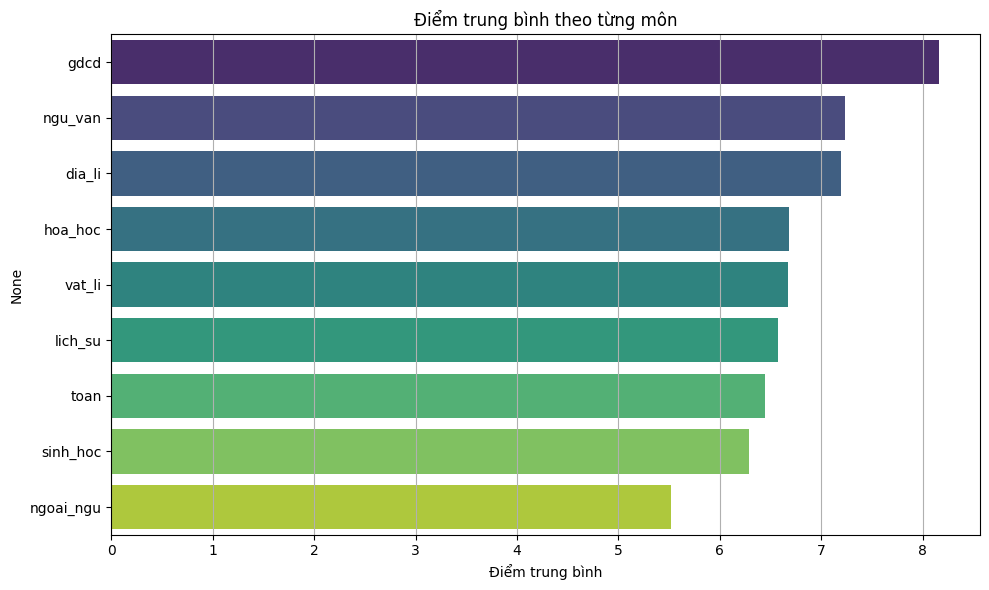

In [12]:
# Loại các cột không liên quan
mon_hoc = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
average_scores = df[mon_hoc].mean().sort_values(ascending=False)

# Biểu đồ điểm trung bình
plt.figure(figsize=(10, 6))
sns.barplot(x=average_scores.values, y=average_scores.index, palette="viridis")
plt.xlabel("Điểm trung bình")
plt.title("Điểm trung bình theo từng môn")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


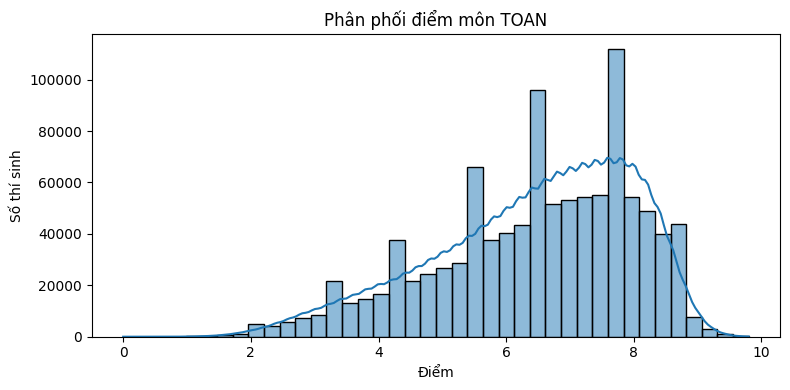

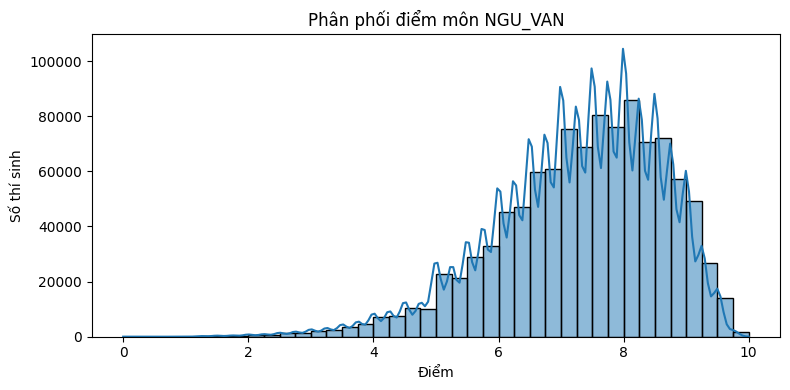

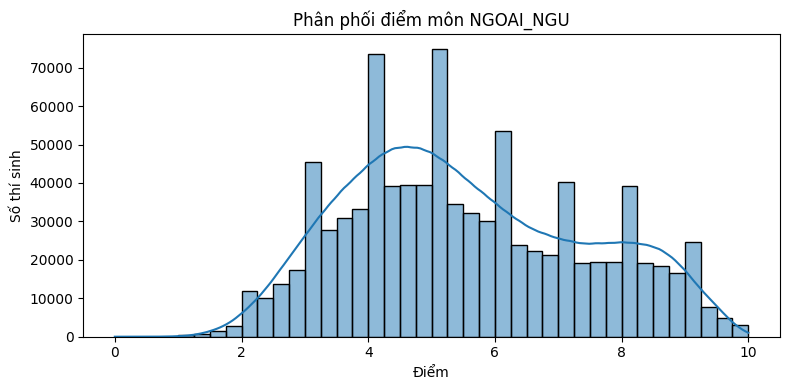

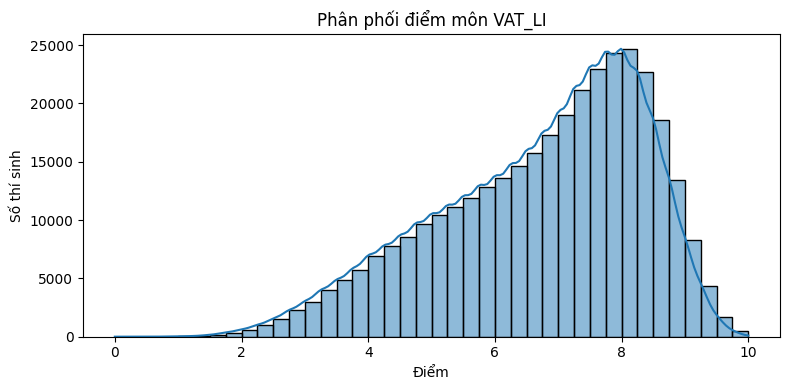

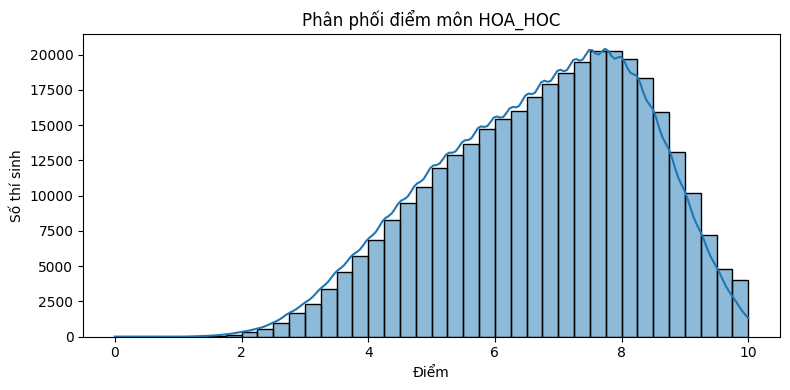

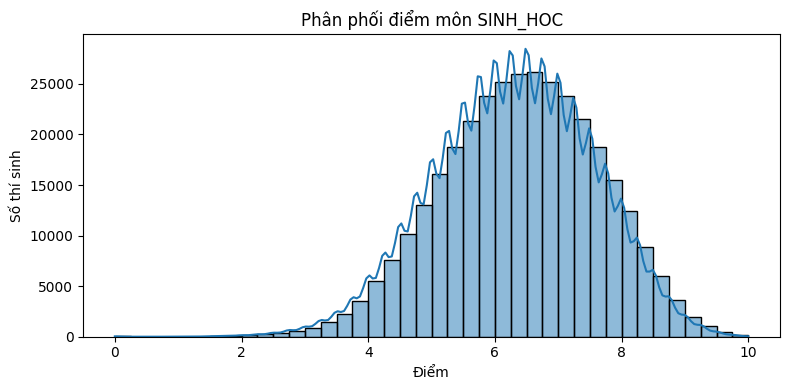

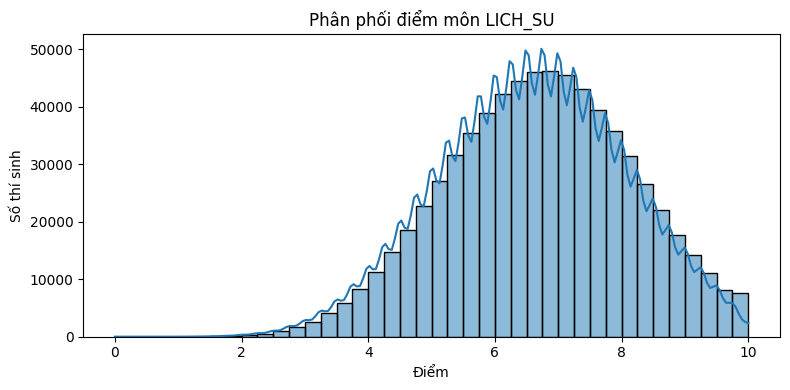

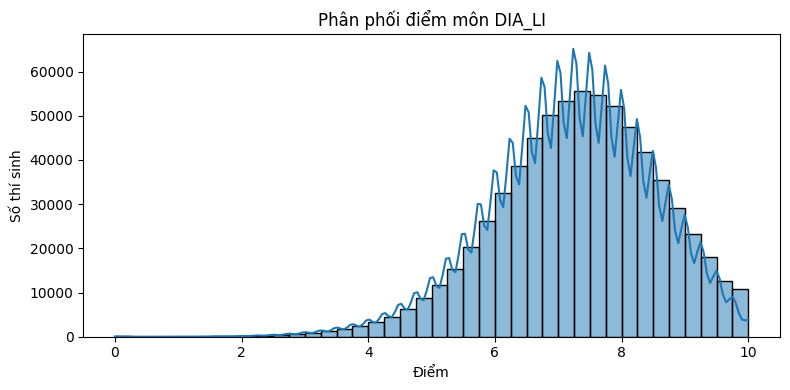

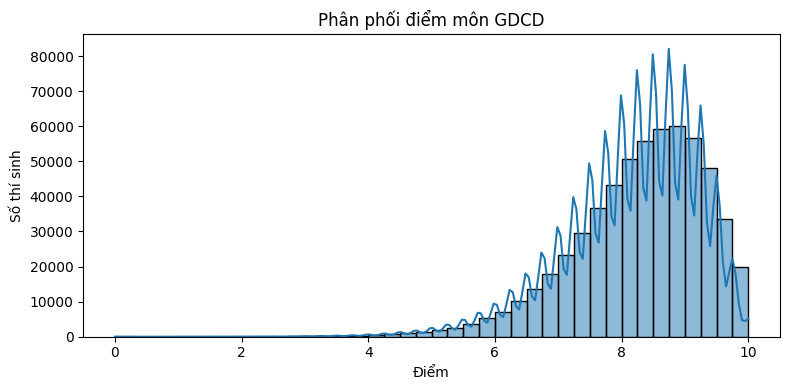

In [13]:
for mon in mon_hoc:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[mon].dropna(), bins=40, kde=True)
    plt.title(f"Phân phối điểm môn {mon.upper()}")
    plt.xlabel("Điểm")
    plt.ylabel("Số thí sinh")
    plt.tight_layout()
    plt.show()


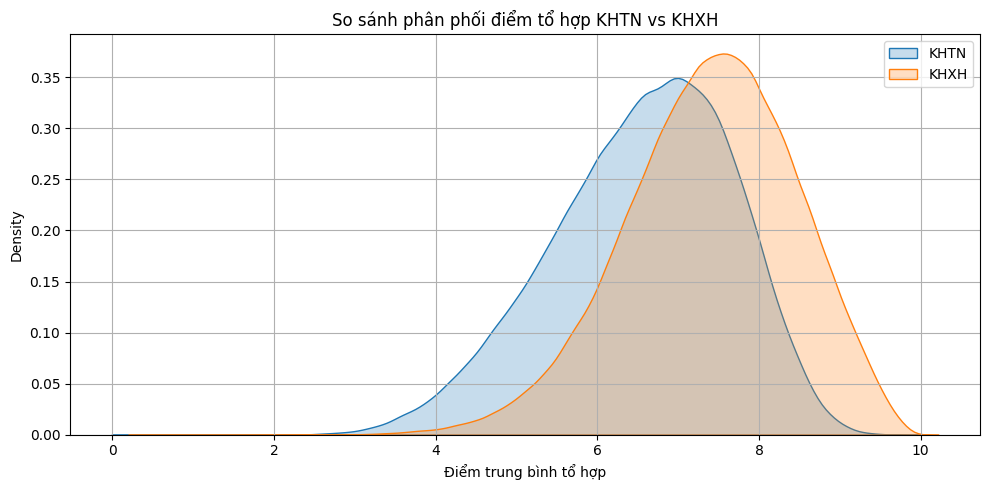

In [14]:
# Tính điểm trung bình tổ hợp
df['KHTN'] = df[['vat_li', 'hoa_hoc', 'sinh_hoc']].mean(axis=1, skipna=False)
df['KHXH'] = df[['lich_su', 'dia_li', 'gdcd']].mean(axis=1, skipna=False)

plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='KHTN', label='KHTN', fill=True)
sns.kdeplot(data=df, x='KHXH', label='KHXH', fill=True)
plt.title("So sánh phân phối điểm tổ hợp KHTN vs KHXH")
plt.xlabel("Điểm trung bình tổ hợp")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
print("Môn có điểm trung bình cao nhất:", average_scores.idxmax(), average_scores.max())
print("Môn có điểm trung bình thấp nhất:", average_scores.idxmin(), average_scores.min())


Môn có điểm trung bình cao nhất: gdcd 8.156503326713604
Môn có điểm trung bình thấp nhất: ngoai_ngu 5.521937975578091


Các mã ngoại ngữ phổ biến:
ma_ngoai_ngu
N1    906538
N4      3932
N6       710
N3       709
N7       603
N5       149
N2        64
Name: count, dtype: int64


C:\Users\PC-NhuDangKocho\AppData\Local\Temp\ipykernel_80464\4059664734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='magma')


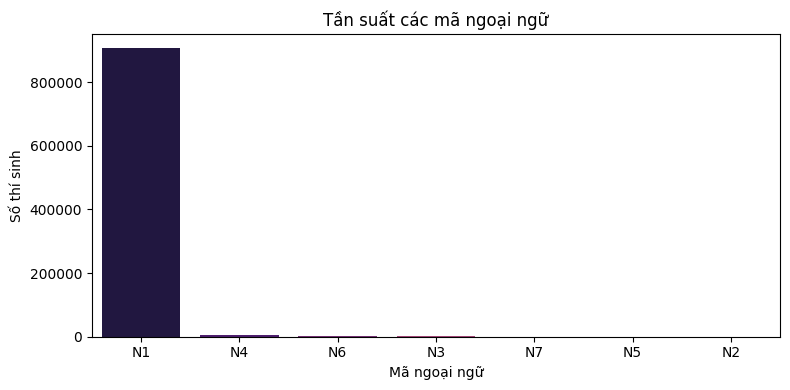

In [16]:
language_counts = df['ma_ngoai_ngu'].value_counts()
print("Các mã ngoại ngữ phổ biến:")
print(language_counts)

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='magma')
plt.title("Tần suất các mã ngoại ngữ")
plt.xlabel("Mã ngoại ngữ")
plt.ylabel("Số thí sinh")
plt.tight_layout()
plt.show()
